In [1]:
%matplotlib inline
from basketballCrawler import basketballCrawler as bc
import matplotlib.pyplot as plt

Loading in the player dictionary from JSON is straightforward:

In [2]:
players = bc.loadPlayerDictionary("players.json")

Player positions, height, and weight, are already stored in the player objects. We could make a scatter plot by position:

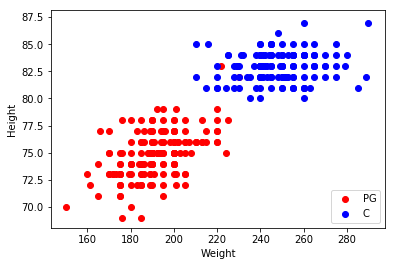

In [3]:
point_guards =  [players[name] for name in players if "Point Guard" in players[name].positions]
centers = [players[name] for name in players if "Center" in players[name].positions]

pg_weights = [int(p.weight) for p in point_guards]
c_weights = [int(p.weight) for p in centers]

# getting the heights requires parsing of strings, e.g. "6-3" -> 75 (inches)
def parse_height_value(height_string):
    ft,inches = [int(val) for val in height_string.split('-')]
    return ft*12 + inches

pg_heights = [parse_height_value(p.height) for p in point_guards]
c_heights = [parse_height_value(p.height) for p in centers]  

plt.scatter(pg_weights,pg_heights,c="red",label="PG")
plt.scatter(c_weights,c_heights,c="blue",label="C")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.legend(loc=4)

That's a pretty interesting outlier. Let's see who it is:

In [14]:
print([p.name for p in centers if int(p.weight) > 285])

['Al Jefferson', 'Boban Marjanovic']


We can also delve into game-by-game stats for individual players.

In [ ]:
sc = bc.allGameLogs(players, u'Stephen Curry')
sc.to_json()

In [ ]:
pau_games = bc.allGameLogs(players, u'Pau Gasol')
pau_games.reset_index().head()

Now we could observe some individual stats for a player, **using the same API calls as before this PR**.

In [ ]:
recent_games = pau_games.loc[pau_games.index > '2016-01-01']
recent_games.head()

In [ ]:
plt.plot(recent_games.TRB,'-o')
plt.plot(recent_games.PF,'-o')

We could use this to compare the recent performance (by +/-) of two players.

In [4]:
rw = bc.allGameLogs(players, u'Russell Westbrook')
sc = bc.allGameLogs(players, u'Stephen Curry')

recent_rw = rw.loc[rw.index >= '2016-01-01']
recent_sc = sc.loc[rw.index >= '2016-01-01']

TypeError: '>=' not supported between instances of 'numpy.ndarray' and 'numpy.ndarray'

In [ ]:
plt.plot(recent_rw["+/-"],'-o')
plt.plot(recent_sc["+/-"],'-o')

In [ ]:
print rw